# Arbitrary state initialization
You can initialize the qubits at a particular state rather than applying quantum gates & stuff.

In [ ]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.8 MB 5.2 MB/s 
     |████████████████████████████████| 12.8 MB 57.4 MB/s 
     |████████████████████████████████| 240 kB 56.1 MB/s 
     |████████████████████████████████| 106 kB 59.4 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 49 kB 6.7 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 929 kB 60.7 MB/s 
     |████████████████████████████████| 4.0 MB 46.9 MB/s 
     |████████████████████████████████| 1.9 MB 51.6 MB/s 
     |████████████████████████████████| 112 kB 60.7 MB/s 
  Created wheel for qiskit: filename=qiskit-0.39.4-py3-none-any.whl size=12274 sha256=af47d292d693b43c5cb9682b376c35a6151449263f642cbf1e60e137f1335a7f
  Stored in directory: /root/.cache/pip/wheels/40/2c/d7/aa04

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from math import sqrt

In [ ]:
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc0 = QuantumCircuit(q,c)
qc1 = QuantumCircuit(q,c)

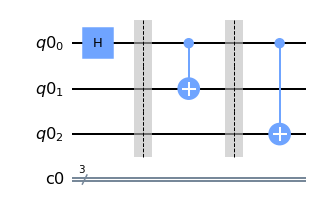

In [ ]:
qc0.h(q[0])
qc0.barrier()
qc0.cx(q[0],q[1])
qc0.barrier()
qc0.cx(q[0],q[2])
qc0.draw("mpl")

In [ ]:
psi0 = Statevector(qc0)
psi0.draw("latex")

<IPython.core.display.Latex object>

# using initialization function:
1) Define aplitude vector <br/>
2) Initialize the quantum circuit with the amplitude vector and a list of qubits.

In [ ]:
amp = [sqrt(2)/2,0,0,0,0,0,0,sqrt(2)/2]

In [ ]:
qc1.initialize(amp,[q[0],q[1],q[2]])

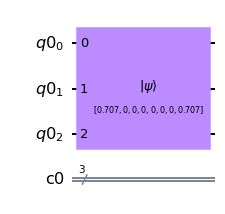

In [ ]:
qc1.draw("mpl")

In [ ]:
# make some measurements
qc0.measure(q[0],c[0])
qc0.measure(q[1],c[1])
qc0.measure(q[2],c[2])

# second circuit
qc1.measure(q[0],c[0])
qc1.measure(q[1],c[1])
qc1.measure(q[2],c[2])

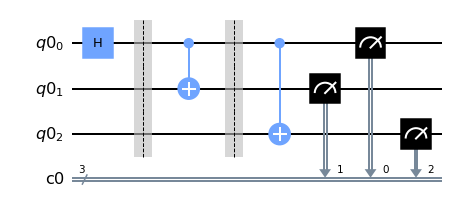

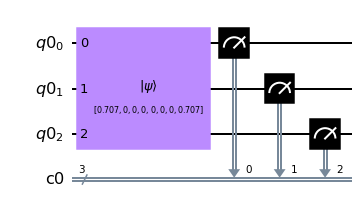

In [ ]:
display(qc0.draw("mpl"),qc1.draw("mpl"))

In [ ]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()

qc_list = [qc0,qc1]

qc_compiled = transpile(qc_list,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'111': 504, '000': 520}, {'111': 504, '000': 520}]


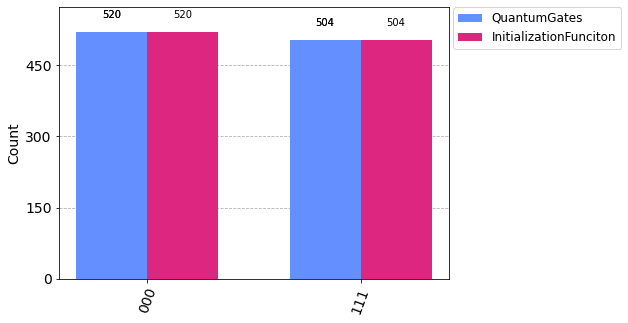

In [ ]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,legend = ["QuantumGates","InitializationFunciton"])